<a href="https://colab.research.google.com/github/mohamadarif03/zero-to-deep/blob/main/sesi2pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
for images, labels in train_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
from torch.nn.modules import  Conv2d
from torch.nn.modules.pooling import MaxPool2d

class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()

    self.features = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    self.classifer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=32*7*7, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=10)
    )
  def forward(self, x):
    x = self.features(x)
    x = self.classifer(x)

    return x


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Menggunakan Device:  {device}")

model = SimpleCNN()
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#

Menggunakan Device:  cuda


In [ ]:
epochs = 5

for epoch in range(epochs):
  model.train()
  running_loss = 0

  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")
#

Epoch [1/5], Loss: 0.4697
Epoch [2/5], Loss: 0.3026
Epoch [3/5], Loss: 0.2592
Epoch [4/5], Loss: 0.2269
Epoch [5/5], Loss: 0.2054


In [ ]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()


print(f"Akurasi: {(100 * correct / total):.2f}%")
#

Akurasi: 91.29%


In [ ]:
!pip install torchview

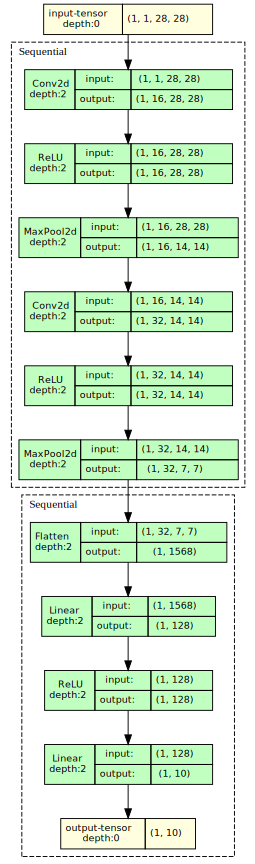

In [ ]:
from torch.cuda import graph
from torchview import draw_graph

graph = draw_graph(model,
                   input_data = torch.rand(1, 1, 28, 28),
                   expand_nested=True,
                   save_graph=True,
                   filename="simplecnn"
                   )
graph.visual_graph